<a href="https://colab.research.google.com/github/aliwilson2000/AMLFinal/blob/main/SubsetAMLFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Client Specific Subset: Alicia Wilson, Swimming

As part of the project we want to see if there is a client specific subset we can create. Alicia Wilson is our client (and student on this project). She is a swimmer. Part of her training includes 20+ hours a week in the swimming pool and 3+ hours a week in the weight room. As a result we have taken the relevant categories from the UFC-50 dataset which will be passed into the networks we have created.

<br> **This Google Collab walks us through the steps taken to get this subset:**

Step 1: Download the UFC-50 dataset (this is much smaller than the 101 so easier to deal with when creating our own subsets...) <br>
*I downloaded this directly to Collab...*

<br> NB: while this is not reccommended I had to bypass the certificate to download this dataset:

In [7]:
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar -O U

--2023-12-03 15:48:38--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/rar]
Saving to: ‘U’

U                   100%[===================>]   3.01G  51.9MB/s    in 38s     

2023-12-03 15:49:16 (81.5 MB/s) - ‘U’ saved [3233554570/3233554570]



In [8]:
!mv U UCF50.rar

In [9]:
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [10]:
!unrar x UCF50.rar

Streaming output truncated to the last 5000 lines.
Extracting  UCF50/HorseRace/v_HorseRace_g16_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g16_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c03.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c04.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g17_c05.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c01.avi                       23%  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g18_c02.avi                       23%  OK 
Extracting  UCF50/HorseRace/v

### Checking the categories: from here I will pick the relevant ones to inclide:

In [15]:
!ls UCF50

BaseballPitch  Fencing	      JumpRope	      PlayingTabla	  Rowing	  ThrowDiscus
Basketball     GolfSwing      Kayaking	      PlayingViolin	  SalsaSpin	  TrampolineJumping
BenchPress     HighJump       Lunges	      PoleVault		  SkateBoarding   VolleyballSpiking
Biking	       HorseRace      MilitaryParade  PommelHorse	  Skiing	  WalkingWithDog
Billiards      HorseRiding    Mixing	      PullUps		  Skijet	  YoYo
BreastStroke   HulaHoop       Nunchucks       Punch		  SoccerJuggling
CleanAndJerk   JavelinThrow   PizzaTossing    PushUps		  Swing
Diving	       JugglingBalls  PlayingGuitar   RockClimbingIndoor  TaiChi
Drumming       JumpingJack    PlayingPiano    RopeClimbing	  TennisSwing


Relevant categories:
- BreastStroke
- Clean and Jerk
- Diving
- Jumping Jack
- Lunges
- Pull Ups
- Push Ups
- Bench Press

In [12]:
import cv2
import os

# Example to load a video file from one of the categories
video_path = os.path.join('UCF50', 'category_name', 'video_file.avi')
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    # Process the frame (e.g., display, save, or pass to a model)

cap.release()

In [13]:
!mkdir UCF50_subset

In [16]:
!cp -r UCF50/BenchPress UCF50_subset/
!cp -r UCF50/BreastStroke UCF50_subset/
!cp -r UCF50/CleanAndJerk UCF50_subset/
!cp -r UCF50/Diving UCF50_subset/
!cp -r UCF50/Lunges UCF50_subset/
!cp -r UCF50/PullUps UCF50_subset/
!cp -r UCF50/PushUps UCF50_subset/
!cp -r UCF50/JumpingJack UCF50_subset/

In [17]:
!ls UCF50_subset

BenchPress  BreastStroke  CleanAndJerk	Diving	JumpingJack  Lunges  PullUps  PushUps


In [49]:
from IPython.display import HTML
from base64 import b64encode

video_path = 'UCF50/Lunges/v_Lunges_g23_c04.avi'  # Replace with your chosen file path

mp4 = open(video_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)

#Instagram CSV captions quick EDA

In [18]:
from google.colab import files

uploaded = files.upload()


Saving captions_csv.csv to captions_csv.csv


In [22]:
import pandas as pd
df = pd.read_csv('captions_csv.csv')

# Display the first few rows of the dataframe
df.head()

,Caption
0,bye
1,"Ok, a few more... sorry I just had so much fun..."
2,This was one of my favorite shoots I’ve ever d...
3,Wrapped round my finger like a ring
4,Yesterday was so much fun!! has been such a hu...


In [37]:
df['caption_length'] = df['Caption'].str.len()
df[:15]

,Caption,caption_length,word_count
0,bye,4,1
1,"Ok, a few more... sorry I just had so much fun...",56,13
2,This was one of my favorite shoots I’ve ever d...,178,33
3,Wrapped round my finger like a ring,36,7
4,Yesterday was so much fun!! has been such a hu...,178,35
5,Well..,7,1
6,It’s officially out! I was a bit embarrassed a...,282,56
7,I hope you guys are liking the album! I just w...,232,49
8,Did it again 🦋 rare,20,5
9,R.A.R.E,8,1


In [26]:
df['word_count'] = df['Caption'].str.split().apply(len)
df

,Caption,caption_length,word_count
0,bye,4,1
1,"Ok, a few more... sorry I just had so much fun...",56,13
2,This was one of my favorite shoots I’ve ever d...,178,33
3,Wrapped round my finger like a ring,36,7
4,Yesterday was so much fun!! has been such a hu...,178,35
...,...,...,...
17095,Cowgirl :),11,2
17096,<3,3,1
17097,I love me and Kylie's nail polish colors!,42,8
17098,Fammm,6,1


In [27]:
average_length = df['word_count'].mean()

print(f"The average length of the captions is: {average_length} words")

The average length of the captions is: 9.39485380116959 words


In [30]:
average_length = df['caption_length'].mean()

print(f"The average length of the captions (not in words, in characters) is: {average_length}")

The average length of the captions (not in words, in characters) is: 49.58836257309942


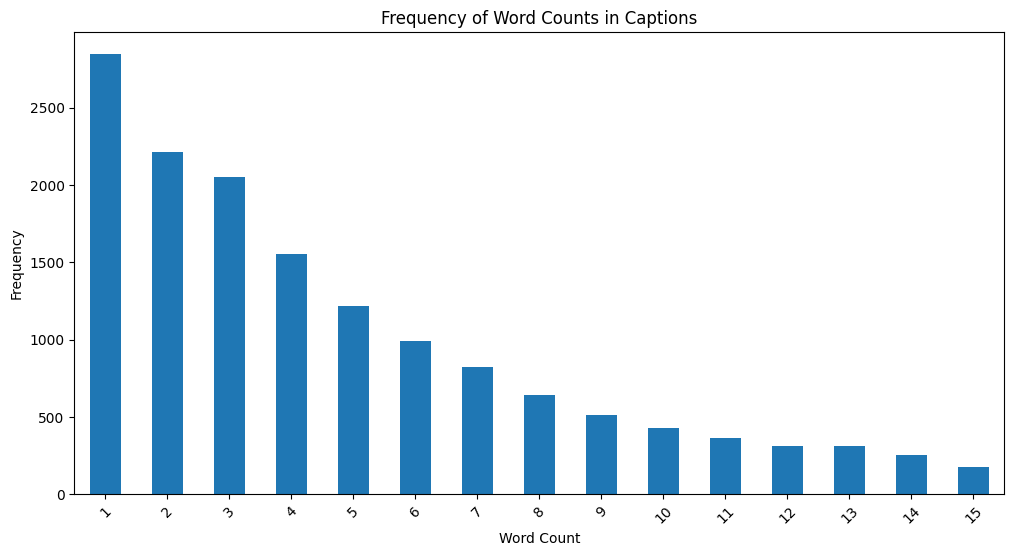

In [33]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'word_count' is the column with the word counts

# Group by word count and count the occurrences
word_count_freq = df.groupby('word_count').size()[:15]

# Plotting
word_count_freq.plot(kind='bar', figsize=(12, 6))

plt.title('Frequency of Word Counts in Captions')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [35]:
import pandas as pd

# Assuming df is your DataFrame and 'word_count' is the column with the word counts
# Filter the DataFrame for captions with exactly 1 word
one_word_captions = df[df['word_count'] == 1]

# Display the first ten examples
one_word_captions.head(10)


,Caption,caption_length,word_count
0,bye,4,1
5,Well..,7,1
9,R.A.R.E,8,1
80,familia,8,1
88,🖤,2,1
102,life,5,1
115,#NAME?,6,1
137,Tonight,8,1
140,🌙,2,1
147,🐺🐺,3,1


In [41]:
caption_at_index_12 = df.at[200, 'Caption']

print(f"Caption at index 12: {caption_at_index_12}")

Caption at index 12: As the new face of they gave me the opportunity to personalize this bag for my Momma (that I’m pretty sure my sister is going to steal anyhow). This is a very common exchange between the two of us. Happy (early) Mother’s Day to the woman who is the reason for my existence. 


In [42]:
len(df)

17100

In [44]:
df['word_count'].min()

1

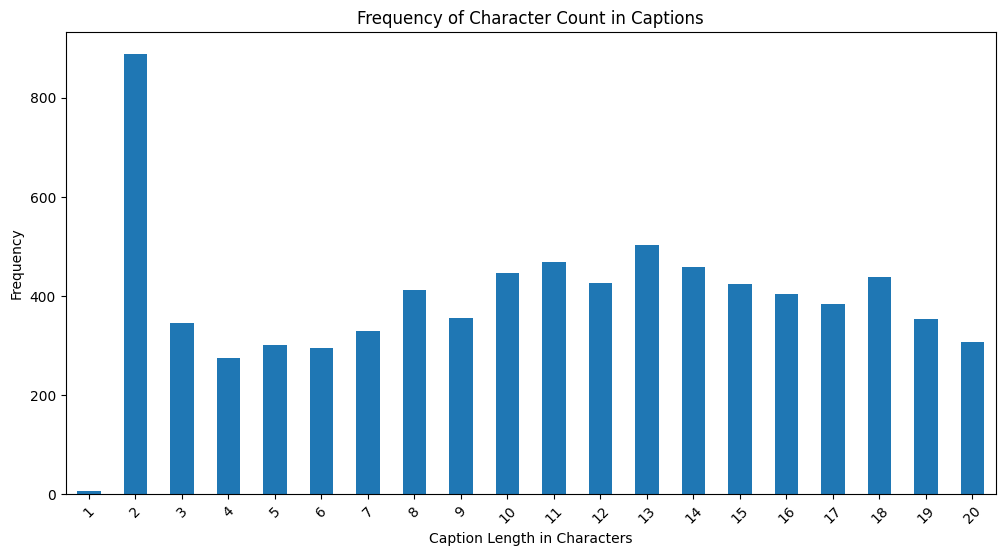

In [46]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'word_count' is the column with the word counts

# Group by word count and count the occurrences
word_count_freq = df.groupby('caption_length').size()[:20]

# Plotting
word_count_freq.plot(kind='bar', figsize=(12, 6))

plt.title('Frequency of Character Count in Captions')
plt.xlabel('Caption Length in Characters')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()